# <center>Modularity-Inbetweenness-visualization JN</center>
This jupyter-notebook is used to show the difference between graph/network theory community detection algorithms.


<center>Figure 1: ....</center>
<br>
<br>


# Imports

In [1]:
# Import necessary libraries
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

#from collections import defaultdict
#import itertools

# Create simply spatial 2x8 network with only neighbor node edges

Removing edge from node pair 5-6


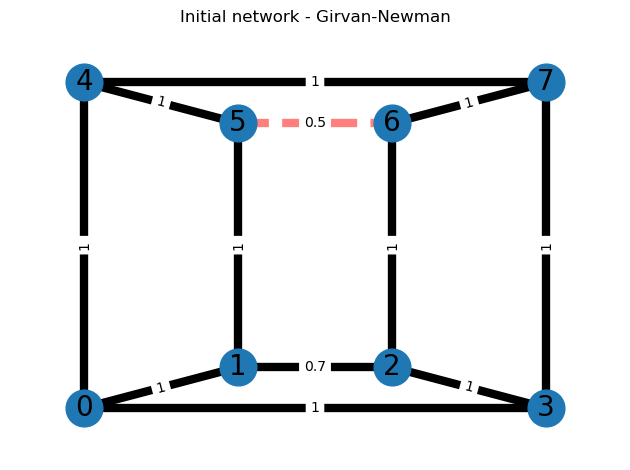

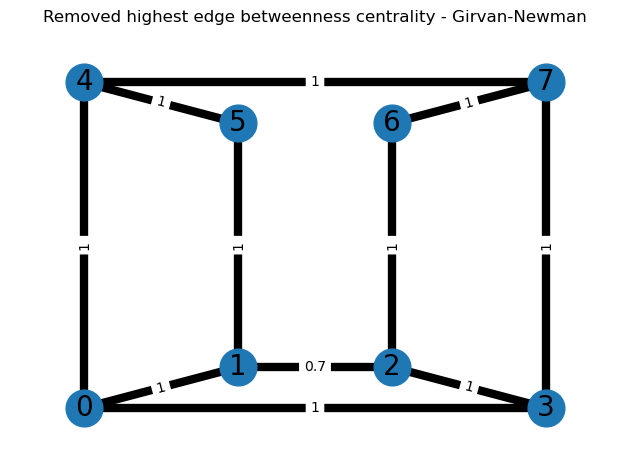

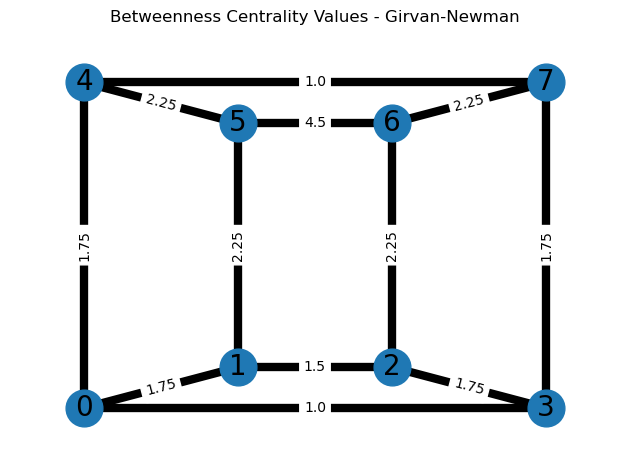

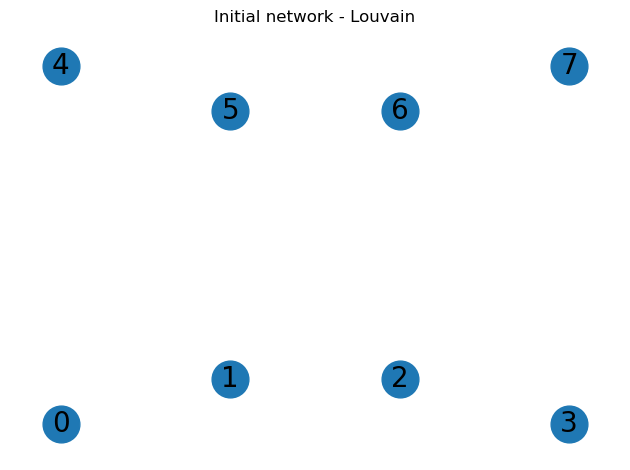

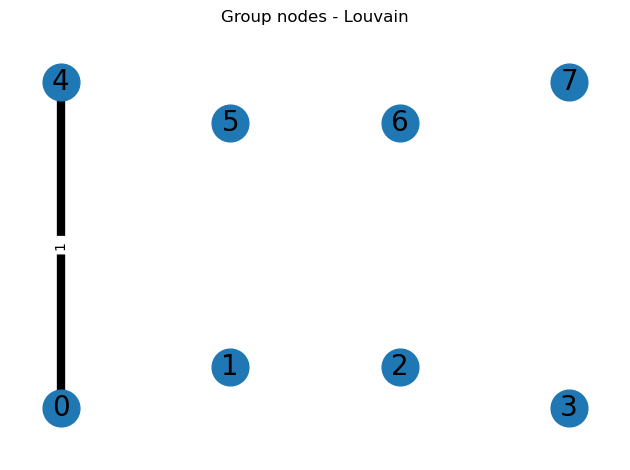

In [20]:
class NeighborNetwork():
    """
    createNeighborNetwork is a function designed
    to create an networkx spatial graph with neighbor
    node edges. Node edges are given a value of 1,
    but can be modified using a method.
    
    """
    
    def __init__(self, size=(2,8)):
        """
        Initializes NeighborNetwork.
        
        Parameters
        -----------
        size : TUPLE
            A tuple describing the size of the output
            graph. The graph will have size[0]*size[1]
            nodes.
        """
        # Construct new graph
        self.G = nx.Graph()
        
        # Add nodes
        ## Create numpy array of input size
        rows = size[0]
        cols = size[1]
        self.XX, self.YY = np.meshgrid(np.arange(cols), np.arange(rows))
        
        # Create nodes
        self.pos = [];
        for x, y in zip(self.XX.flatten(), self.YY.flatten()):
            currentNodeid = x + y*cols;
            self.G.add_node(currentNodeid, pos=(x-(cols-1)/2,
                                                (y-(rows-1)/2)*np.abs(0.4*(x-(cols-1)/2))+(y-(rows-1)/2))
                           )
            self.pos.append(currentNodeid)
        self.pos=np.array(self.pos);
        
        # Iterate over each nodes' xy position adding edges
        # adding each edge.
        for x, y in zip(self.XX.flatten(), self.YY.flatten()):
            # Positions
            #               X + Y*(# of columns) 
            currentNodeid = x + y*cols;
            leftid        = x + y*cols - 1;
            aboveid       = x + (y-1)*cols
            #rightid       = x + y*cols + 1;
            #belowid       = x + (y+1)*cols
            
            # Add edges to other nodes            
            if (x > 0):
                #print("left\t",x, y, ";", currentNodeid,"->", leftid)
                # Make connection left
                self.G.add_edge(currentNodeid,leftid, weight=1)            
            if (y > 0):
                #print("below\t", x, y, currentNodeid, aboveid)
                # Make connection below
                self.G.add_edge(currentNodeid,aboveid, weight=1)
                
            # Add edges to other nodes            
            if (x == 0):
                # Make connection left
                self.G.add_edge(currentNodeid,leftid+cols, weight=1)            
#             if (y == 0):
#                 #print("below\t", x, y, currentNodeid, aboveid)
#                 # Make connection below
#                 self.G.add_edge(currentNodeid,aboveid+rows, weight=1)
                
                
    def plot(self, title="Initial network"):
        elarge = [(u, v) for (u, v, d) in self.G.edges(data=True) if d["weight"] > .5]
        esmall = [(u, v) for (u, v, d) in self.G.edges(data=True) if d["weight"] <= .5]
        
        pos = nx.get_node_attributes(myNeighborNetwork.G, "pos")
        
        # Create new figure
        fig = plt.figure()

        # nodes
        nx.draw_networkx_nodes(self.G, pos, node_size=700)

        # edges
        nx.draw_networkx_edges(self.G, pos, edgelist=elarge, width=6)
        nx.draw_networkx_edges(
            self.G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="r", style="dashed"
        )

        # node labels
        nx.draw_networkx_labels(self.G, pos, font_size=20, font_family="sans-serif")
        # edge weight labels
        edge_labels = nx.get_edge_attributes(self.G, "weight")
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels)

        ax = plt.gca()
        plt.title(title)
        ax.margins(.1)
        plt.axis("off")
        plt.tight_layout()
        #plt.show()
        
        plt.savefig(os.getcwd()+"/figures/CommunityDetectionMethodsPaper/diagrams/"+title+".svg", dpi=600)

###############################
### Girvan-newman algorithm ###
###############################
# Make graph ()
myNeighborNetwork = NeighborNetwork(size=(2,4))
## Change edge attributes
myNeighborNetwork.G.edges[5,6]['weight'] = .5
myNeighborNetwork.G.edges[1,2]['weight'] = .7

# Plot graph
myNeighborNetwork.plot(title='Initial network - Girvan-Newman')

# Girvan-newman algorithm 
def most_central_edge(G):
    centrality = nx.edge_betweenness_centrality(G, weight="weight")
    return max(centrality, key=centrality.get)

# Plot again (removed most central edge)
u,v = most_central_edge(myNeighborNetwork.G)
centrality = nx.edge_betweenness_centrality(myNeighborNetwork.G, weight="weight")
print("Removing edge from node pair {}-{}".format(u,v))

myNeighborNetwork.G.remove_edge(u,v)
myNeighborNetwork.plot(title="Removed highest edge betweenness centrality - Girvan-Newman")


# Plot again (change edge values to centrality values)

## Set node edges to have betweenness centrality value
list(centrality.values())/ np.min(list(centrality.values()))
for nodes in centrality:
    myNeighborNetwork.G.add_edge(nodes[0],
                                 nodes[1],
                                 weight=centrality[nodes]/np.min(list(centrality.values())))

myNeighborNetwork.plot(title="Betweenness Centrality Values - Girvan-Newman")

###############################
###### Louvain algorithm ######
###############################

# Make graph ()
myNeighborNetwork = NeighborNetwork(size=(2,4))

commL = nx.community.louvain_communities(myNeighborNetwork.G, weight='weight', max_level=20)


## Change edge attributes
myNeighborNetwork.G.remove_edge(4,5)
myNeighborNetwork.G.remove_edge(5,6)
myNeighborNetwork.G.remove_edge(6,7)
myNeighborNetwork.G.remove_edge(7,4)

myNeighborNetwork.G.remove_edge(0,1)
myNeighborNetwork.G.remove_edge(1,2)
myNeighborNetwork.G.remove_edge(2,3)
myNeighborNetwork.G.remove_edge(3,0)

myNeighborNetwork.G.remove_edge(4,0)
myNeighborNetwork.G.remove_edge(5,1)
myNeighborNetwork.G.remove_edge(6,2)
myNeighborNetwork.G.remove_edge(7,3)

# Plot graph
myNeighborNetwork.plot(title='Initial network - Louvain')

# Plot graph
## Add edge
myNeighborNetwork.G.add_edge(4,0, weight =1)
## Calculate modularity


## plot again
myNeighborNetwork.plot(title='Group nodes - Louvain')



## plot again
#myNeighborNetwork.plot(title='Reduce network - Louvain')






In [23]:
#for nodes in centrality:
#    node

print( list(centrality.values())/ np.min(list(centrality.values())) )
print( list(centrality.values()) )



[1.   1.75 1.75 1.5  2.25 1.75 2.25 1.75 1.   2.25 4.5  2.25]
[0.07142857142857142, 0.125, 0.125, 0.10714285714285714, 0.1607142857142857, 0.125, 0.1607142857142857, 0.125, 0.07142857142857142, 0.1607142857142857, 0.3214285714285714, 0.1607142857142857]
